# Exploratory Data Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [3]:
types = {
    'PROVINCE_CODE': 'str',
    'TOTAL_SNOW_FLAG': 'str',
    'DIRECTION_MAX_GUST_FLAG': 'str',
    'ID': 'str',
    'MIN_TEMPERATURE_FLAG': 'str',
    'MAX_TEMPERATURE_FLAG': 'str',
    'LOCAL_DATE': 'str',
    'COOLING_DEGREE_DAYS_FLAG': 'str',
    'SNOW_ON_GROUND_FLAG': 'str',
    'MEAN_TEMPERATURE_FLAG': 'str',
    'TOTAL_PRECIPITATION_FLAG': 'str',
}

In [4]:
df = pd.read_csv('2000-2021+2023-2024-fire-weather.csv', dtype=types)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148761 entries, 0 to 148760
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fire_id                   148761 non-null  int64  
 1   lat                       148761 non-null  float64
 2   lon                       148761 non-null  float64
 3   date                      148761 non-null  object 
 4   hectares                  148761 non-null  float64
 5   STATION_NAME              148761 non-null  object 
 6   PROV_STATE_TERR_CODE      148761 non-null  object 
 7   LATITUDE                  148761 non-null  float64
 8   LONGITUDE                 148761 non-null  float64
 9   ELEVATION                 146037 non-null  float64
 10  distance                  148761 non-null  float64
 11  PROVINCE_CODE             35958 non-null   object 
 12  HEATING_DEGREE_DAYS       31956 non-null   float64
 13  TOTAL_SNOW_FLAG           7719 non-null    o

In [10]:
df.head()

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,51.1450,-127.50073,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,1,49.2971,-122.2321,2000-08-21,0.20,PITT LAKE,BC,49.2600,-122.31000,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,55.8000,-124.8167,2005-06-20,0.01,MESILINKA CAMP,BC,56.0700,-124.30000,803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49.8770,-121.5730,2000-08-06,0.10,LYTTON A,BC,50.1328,-121.34550,224.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,49.0667,-121.8333,2000-07-28,0.10,VEDDER SOUTH LICKMAN,BC,49.0600,-122.00000,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,fire_id,lat,lon,hectares,LATITUDE,LONGITUDE,ELEVATION,distance,HEATING_DEGREE_DAYS,DIRECTION_MAX_GUST,...,TOTAL_SNOW,MEAN_TEMPERATURE,SPEED_MAX_GUST,MIN_REL_HUMIDITY,COOLING_DEGREE_DAYS,MAX_TEMPERATURE,LOCAL_YEAR,TOTAL_RAIN,TOTAL_PRECIPITATION,SNOW_ON_GROUND
count,148761.000000,148761.000000,148761.000000,1.487610e+05,148761.000000,148761.000000,146037.000000,148761.000000,31956.000000,10800.00000,...,23220.000000,31956.000000,10839.000000,7868.000000,31956.000000,33675.000000,35958.000000,23018.000000,32290.000000,20168.000000
mean,74380.000000,52.032307,-102.520121,4.641035e+02,52.008772,-102.518765,533.722164,24.676222,3.947835,14.12787,...,0.030177,15.153085,28.035335,38.224962,1.100920,22.310218,2008.928305,1.933739,1.847290,0.400352
std,42943.746035,4.754563,20.945083,7.872712e+03,4.755300,20.902612,418.085939,39.763070,5.152374,12.93195,...,0.565366,6.253920,22.567243,15.494066,1.967685,6.921212,6.554949,5.041713,4.988779,5.295837
min,0.000000,0.000000,-166.044000,0.000000e+00,0.000000,-141.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,-44.800000,0.000000,8.000000,0.000000,-42.700000,2000.000000,0.000000,0.000000,0.000000
25%,37190.000000,49.101900,-118.704167,1.000000e-02,49.130000,-118.550000,245.000000,10.530787,0.000000,0.00000,...,0.000000,11.500000,0.000000,27.000000,0.000000,18.400000,2004.000000,0.000000,0.000000,0.000000
50%,74380.000000,51.332000,-112.104017,1.000000e-01,51.265700,-112.130000,420.600000,19.641312,1.700000,15.00000,...,0.000000,16.300000,35.000000,36.000000,0.000000,23.300000,2007.000000,0.000000,0.000000,0.000000
75%,111570.000000,55.153550,-84.693700,1.000000e+00,55.180000,-84.480000,731.500000,31.307892,6.500000,26.00000,...,0.000000,19.500000,44.000000,47.000000,1.500000,27.000000,2014.000000,1.400000,1.200000,0.000000
max,148760.000000,69.602500,116.188000,1.080520e+06,82.310400,0.000000,2926.100000,5679.881861,62.800000,36.00000,...,37.000000,31.800000,128.000000,100.000000,13.800000,45.500000,2024.000000,168.000000,168.000000,254.000000


## Explore missing data
In this section, we would like to explore missing data. It is often the case that certain climate stations do not offer climate data for the day we are looking for. Every weather data entry contains a column `ID`, but there may be missing other climate entries such as temperature. If a wildfire does not have an associated `ID`, it is because there is simply no weather data at that date at that specific climate station

In [16]:
missing_id = df['ID'].isnull().sum()
missing_percent = missing_id / len(df) * 100

In [17]:
missing_percent

np.float64(75.82834210579385)

We can see that around $\frac{3}{4}$ of wildfires do not have corresponding weather data entries. Since we have over 140000 entries, we will drop all wildfires with no data

In [18]:
df = df.dropna(subset=['ID'])

In [20]:
len(df)

35958

We are still left with 36000 wildfires to explore. However, even amongst the entries that do have climate data, there are many columns that are missing. Some stations do not offer climate data

In [21]:
df

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,51.145000,-127.500730,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
11,11,59.9617,-121.3608,2000-06-27,1000.00,SAMBAA K'E,NT,60.262700,-121.142000,498.0,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,0.0,220CQHR
12,12,59.9752,-121.0342,2000-07-11,12.00,SAMBAA K'E,NT,60.262700,-121.142000,498.0,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,0.0,220CQHR
13,13,59.1767,-122.0190,2001-06-13,5.00,FORT NELSON UA,BC,58.502900,-122.342207,378.3,...,T,NaN,2001.0,0.0,NaN,T,NaN,0.0,0.0,1192950
24,24,59.4008,-120.6438,2000-06-26,0.10,PETITOT LO,AB,59.320000,-119.370000,777.2,...,NaN,NaN,2000.0,1.2,NaN,NaN,NaN,1.2,0.0,3075171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148730,148730,55.8120,-108.9650,2024-07-12,0.10,BUFFALO NARROWS A,SK,55.520000,-108.290000,421.2,...,NaN,NaN,2024.0,NaN,NaN,NaN,NaN,0.0,NaN,4060988
148741,148741,42.4775,-122.6030,2024-07-07,1652.81,RACE ROCKS,BC,48.175274,-123.315319,7.4,...,NaN,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,1016640
148747,148747,66.8992,-141.3160,2024-06-29,2512.57,OLD CROW A,YT,67.341200,-139.502400,250.2,...,M,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,2100807
148750,148750,66.1294,-141.0790,2024-06-19,21266.30,OLD CROW A,YT,67.341200,-139.502400,250.2,...,M,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,2100807


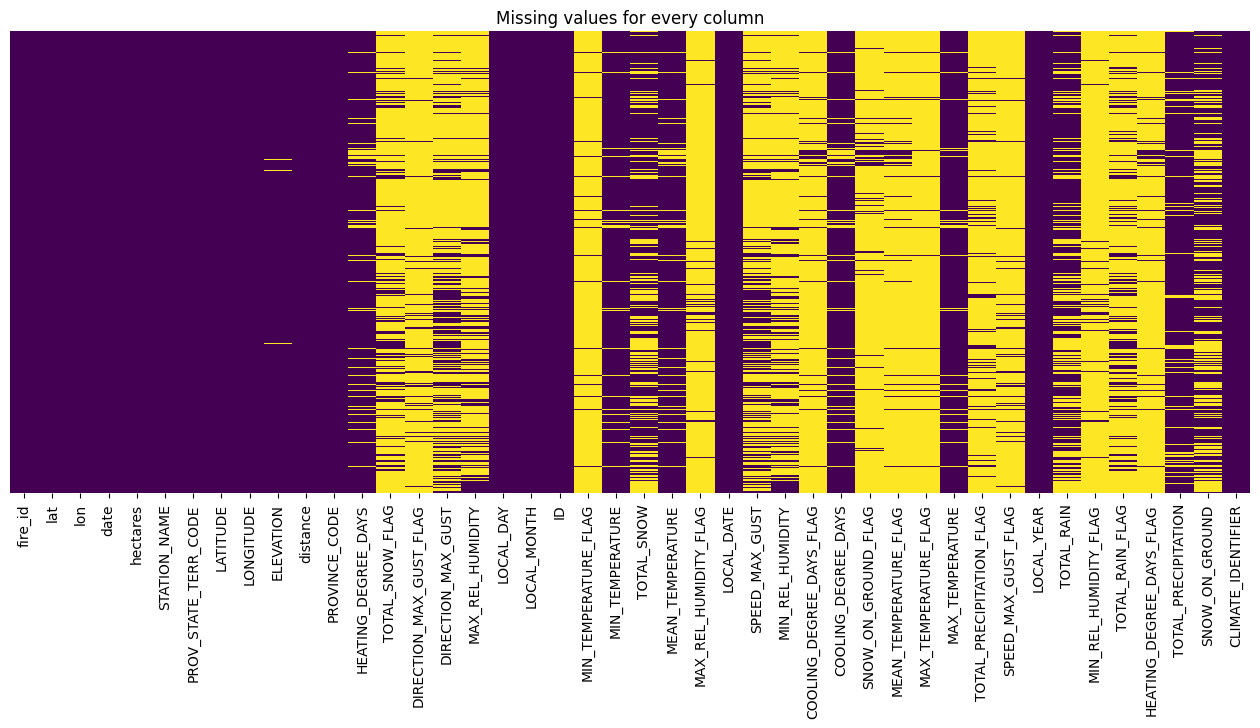

In [29]:
# Heatmap of missing values
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing values for every column')
plt.show()

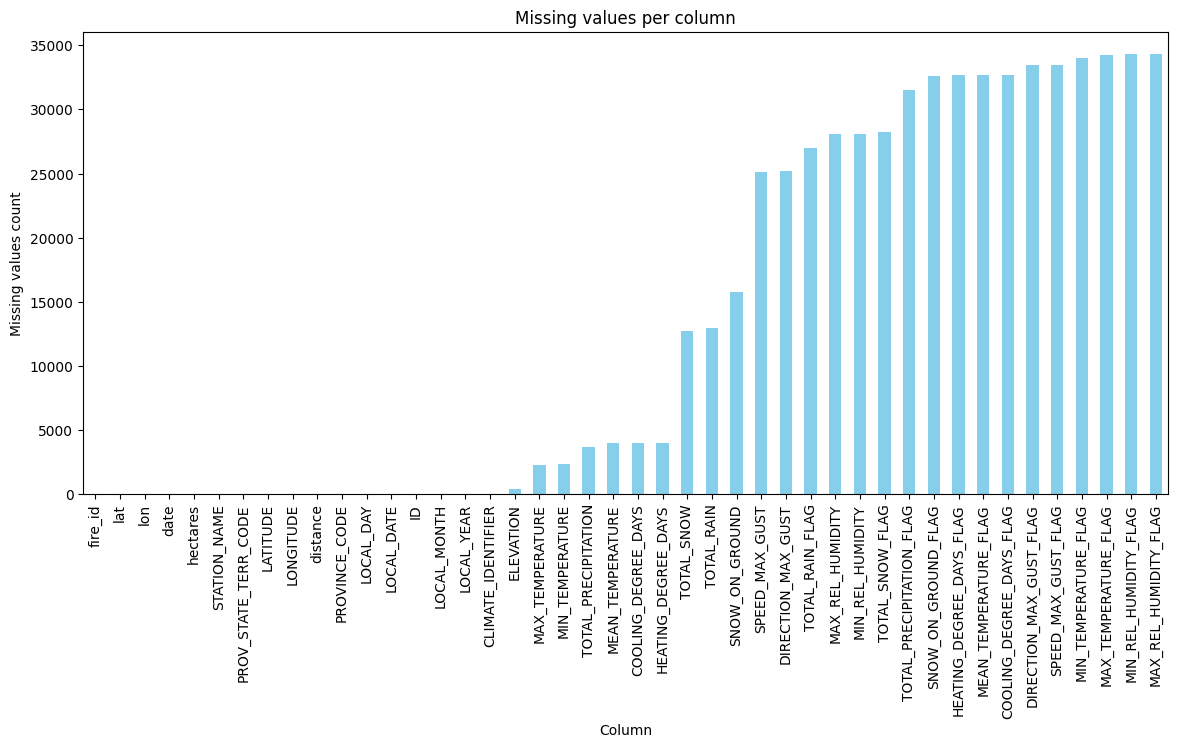

In [32]:
# Bar plot of missing values
missing_values = df.isnull().sum().sort_values(ascending=True)
missing_values.plot(kind='bar', color='skyblue', figsize=(14, 6))
plt.title('Missing values per column')
plt.xlabel('Column')
plt.ylabel('Missing values count')
plt.show()

In [41]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage_df = pd.DataFrame({
    'missing_percentage': missing_percentage
})
missing_percentage_df.sort_values('missing_percentage', ascending=False, inplace=True)

In [42]:
missing_percentage_df

,missing_percentage
MAX_REL_HUMIDITY_FLAG,95.500306
MIN_REL_HUMIDITY_FLAG,95.486401
MAX_TEMPERATURE_FLAG,95.319539
MIN_TEMPERATURE_FLAG,94.702153
SPEED_MAX_GUST_FLAG,93.128094
DIRECTION_MAX_GUST_FLAG,93.039101
HEATING_DEGREE_DAYS_FLAG,90.944991
COOLING_DEGREE_DAYS_FLAG,90.944991
MEAN_TEMPERATURE_FLAG,90.944991
SNOW_ON_GROUND_FLAG,90.666889


Columns with the highest percentage of NaN values are ones with `FLAG`, which is normal because a flag is only present under a specific condition

Most important variables we care about are min/max relative humidity, min/max temperature, direction and max speed gust